# **Aula 3** 
# Regular Expressions - Regex

_Conteúdo da Aula:_

2. Regex do zero:
    - O que é?
    
    - Operações: 
        - a) [find, findall, match, search, finditer]
    - Aplicações para análise 
        - b) [caracteres, checagem, estruturas, grupos e textos]

## O que é Regex?

Expressões Regulares são sequências de símbolos e caracteres que representam um padrão de string. 

Esses padrões podem ser utilizados para extrair ou buscar por informações de interesse em um texto no Python e até mesmo produzir classificações deste material.

Imagine que sua pesquisa investiga o debate públicos sobre os direitos humanos na Câmara dos Deputados, que o material da pesquisa são projetos de lei elaborados por deputados religiosos, e que tratem dos temas de gênero, diversidade de gênero. 

Que material devo ler, quais termos buscar? [ideologia de gênero, gayzismo, ditadura das minorias, doutrinação sexual]

Portanto, o Regex é uma ferramenta fundamental para pesquisadores que trabalham como etnografias, entrevistas, material jurídico, redes sociais, ou seja, qualquer conteúdo textual.

Com Regex, você pode buscas de termos(s) em strings ou conjuntos de strings (palavras, frases, parágrafos, textos, livros).

1) Precisamos importar a biblioteca

In [3]:
import re
import pandas as pd

### Trabalhando com caracteres

In [224]:
# [^] -> usado para indicar o conjunto de caracteres que NÃO podem conter na pesquisa.
#  ^  -> verifica strings iniciadas por caracteres indicados

texto = 'de tudo ao meu amor serei atento antes'

exemplo1 = re.compile(r'amo') 
exemplo2 = re.compile(r'[^abcd]') 

output1 = exemplo1.findall(texto)
output2 = exemplo2.findall(texto)


print(output1)
print(output2)

['amo']
['e', ' ', 't', 'u', 'o', ' ', 'o', ' ', 'm', 'e', 'u', ' ', 'm', 'o', 'r', ' ', 's', 'e', 'r', 'e', 'i', ' ', 't', 'e', 'n', 't', 'o', ' ', 'n', 't', 'e', 's', ' ', 's', 'o', 'm', 'e', 'n', 't', 'e', ' ', 'e', 'm', ' ', '2', '0', '4', '0']


In [246]:
# \d - Qualquer caracter que SEJA um algarismo  de 0 a 9
# \D - Qualquer caracter que NÃO SEJA um algarismo de 0 a 9

texto = 'de tudo ao meu amor serei atento antes mas somente em 2040 ou 2100'

exemplo1 = re.compile(r'\d') 
exemplo2 = re.compile(r'\D') 

output1 = exemplo1.findall(texto)
output2 = exemplo2.findall(texto)

print(output1,'\n', output2)

"".join(output2)

['2', '0', '4', '0', '2', '1', '0', '0'] 
 ['d', 'e', ' ', 't', 'u', 'd', 'o', ' ', 'a', 'o', ' ', 'm', 'e', 'u', ' ', 'a', 'm', 'o', 'r', ' ', 's', 'e', 'r', 'e', 'i', ' ', 'a', 't', 'e', 'n', 't', 'o', ' ', 'a', 'n', 't', 'e', 's', ' ', 'm', 'a', 's', ' ', 's', 'o', 'm', 'e', 'n', 't', 'e', ' ', 'e', 'm', ' ', ' ', 'o', 'u', ' ']


'de tudo ao meu amor serei atento antes mas somente em  ou '

### Métodos de Checagem

In [266]:
texto = 'De tudo ao meu amor serei atento Antes, e com tal zelo, e sempre, e tanto Que mesmo em face do maior encanto Dele se encante mais meu pensamento.'

check_findall = re.findall(r'a', texto) ## retorna uma lista com todas as vezes que o termo aparece no texto
check_match = re.match(r'a', texto) ## busca a partir do início da string
check_search = re.search(r'a', texto) ## busca em qualquer parte da string
check_finditer = re.finditer(r'a', texto)

print(f"Resultado de findall: {check_findall}'\n'\
Resultado de match: {check_match}'\n'\
Resultado de search: {check_search}'\n'\
Resultado de finditer: {check_finditer}")


Resultado de findall: ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']'
'Resultado de match: None'
'Resultado de search: <re.Match object; span=(8, 9), match='a'>'
'Resultado de finditer: <callable_iterator object at 0x0000022C07752920>


> A função finditer permite a realização de iterações, o que é útil para encontrar informações em textos.

In [311]:
# lista de ministros
ministros = [
    'Fachin','Moraes', 'Barroso', 'Zanin', 'Carmen Lúcia', 'Fux', 'Mendonça', 'Marques', 'Toffolli', 'Mendes', 'Weber'
    ]
# conta os itens da lista
print(len(ministros))

# imprimir os nomes na tela
for ministro in ministros:
    print(ministro)



11
Fachin
Moraes
Barroso
Zanin
Carmen Lúcia
Fux
Mendonça
Marques
Toffolli
Mendes
Weber


In [328]:
ministros = [
    'Fachin','Moraes', 'Barroso', 'Zanin', 'Carmen Lúcia', 'Fux', 'Mendonça', 'Marques', 'Toffolli', 'Mendes', 'Weber'
    ]

check = []

for ministro in ministros:
    
    check_finditer = re.finditer(r'a', ministro)
    
    for item in check_finditer:
        print(ministro, '- >', item)

Fachin - > <re.Match object; span=(1, 2), match='a'>
Moraes - > <re.Match object; span=(3, 4), match='a'>
Barroso - > <re.Match object; span=(1, 2), match='a'>
Zanin - > <re.Match object; span=(1, 2), match='a'>
Carmen Lúcia - > <re.Match object; span=(1, 2), match='a'>
Carmen Lúcia - > <re.Match object; span=(11, 12), match='a'>
Mendonça - > <re.Match object; span=(7, 8), match='a'>
Marques - > <re.Match object; span=(1, 2), match='a'>


documento | texto
----------| -----------------------------------------
doc1      | texto1 qualquer que você quer analisar
doc2      | texto2 qualquer que você quer analisar
doc3      | texto2 qualquer que você quer analisar

### Estruturas

In [436]:
texto = 'De tudo ao meu amor serei atento Antes, e com tal zelo, e sempre, e tanto Que mesmo em face do maior encanto Dele se encante mais meu pensamento. Teste 2022'

# [a-z]
# [A-Z]
# [a-zA-Z]
# [0-9]
# [a-zA-Z]+ [0-9]\w+

correspondencias = re.finditer(r'[a-z]\w+', texto)

l = []

for correspondencia in correspondencias:
    #print(correspondencia[0])
    lista = correspondencia
    l.append(lista) ### inserir a posição para extrair uma lista [0]

l

[<re.Match object; span=(3, 7), match='tudo'>,
 <re.Match object; span=(8, 10), match='ao'>,
 <re.Match object; span=(11, 14), match='meu'>,
 <re.Match object; span=(15, 19), match='amor'>,
 <re.Match object; span=(20, 25), match='serei'>,
 <re.Match object; span=(26, 32), match='atento'>,
 <re.Match object; span=(34, 38), match='ntes'>,
 <re.Match object; span=(42, 45), match='com'>,
 <re.Match object; span=(46, 49), match='tal'>,
 <re.Match object; span=(50, 54), match='zelo'>,
 <re.Match object; span=(58, 64), match='sempre'>,
 <re.Match object; span=(68, 73), match='tanto'>,
 <re.Match object; span=(75, 77), match='ue'>,
 <re.Match object; span=(78, 83), match='mesmo'>,
 <re.Match object; span=(84, 86), match='em'>,
 <re.Match object; span=(87, 91), match='face'>,
 <re.Match object; span=(92, 94), match='do'>,
 <re.Match object; span=(95, 100), match='maior'>,
 <re.Match object; span=(101, 108), match='encanto'>,
 <re.Match object; span=(110, 113), match='ele'>,
 <re.Match object; 

### Grupos e Textos

In [60]:
textoPlEsp = '''
Esta proposição se espelha em anteprojeto de lei elaborado pelo movimento Escola sem Partido (www.escolasempartido.org) – “uma iniciativa conjunta de estudantes e pais preocupados com o grau de contaminação político-ideológica das escolas brasileiras, em todos os níveis: do ensino básico ao superior” –, cuja robusta justificativa subscrevemos: 
“É fato notório que professores e autores de livros didáticos vêm-se utilizando de suas aulas e de suas obras para tentar obter a adesão dos estudantes a determinadas correntes políticas e ideológicas; e para fazer com que eles adotem padrões de julgamento e de conduta moral – especialmente moral sexual – incompatíveis com os que lhes são ensinados por seus pais ou responsáveis.
Diante dessa realidade – conhecida por experiência direta de todos os que passaram pelo sistema de ensino nos últimos 20 ou 30 anos –, entendemos que é necessário e urgente adotar medidas eficazes para prevenir a prática da doutrinação política e ideológica nas escolas, e a usurpação do direito dos pais a que seus filhos recebam a educação moral que esteja de acordo com suas próprias convicções.
Trata-se, afinal, de práticas ilícitas, violadoras de direitos e liberdades fundamentais dos estudantes e de seus pais ou responsáveis, como se passa a demonstrar:
1 - A liberdade de aprender – assegurada pelo art. 206 da Constituição Federal – compreende o direito do estudante a que o seu conhecimento da realidade não seja manipulado, para fins políticos e ideológicos, pela ação dos seus professores;
2 - Da mesma forma, a liberdade de consciência, garantida pelo art. 5º, VI, da Constituição Federal, confere ao estudante o direito de não ser doutrinado por seus professores;
3 - O caráter obrigatório do ensino não anula e não restringe a liberdade de consciência do indivíduo. Por isso, o fato de o estudante ser obrigado a assistir às aulas de um professor implica para esse professor o dever de não utilizar sua disciplina como instrumento de cooptação político-partidária ou ideológica;
4 - Ora, é evidente que a liberdade de aprender e a liberdade de consciência dos estudantes restarão violadas se o professor puder se aproveitar de sua audiência cativa para promover em sala de aula suas próprias concepções políticas, ideológicas e morais;
5 - Liberdade de ensinar – assegurada pelo art. 206, II, da Constituição Federal – não se confunde com liberdade de expressão; não existe liberdade de expressão no exercício estrito da atividade docente, sob pena de ser anulada a liberdade de consciência e de crença dos estudantes, que formam, em sala de aula, uma audiência cativa; 
6 - De forma análoga, não desfrutam os estudantes de liberdade de escolha em relação às obras didáticas e paradidáticas cuja leitura lhes é imposta por seus professores, o que justifica o disposto no art. 8º, I, do projeto de lei; 
7 - Além disso, a doutrinação política e ideológica em sala de aula compromete gravemente a liberdade política do estudante, na medida em que visa a induzi-lo a fazer determinadas escolhas políticas e ideológicas, que beneficiam, direta ou indiretamente as políticas, os movimentos, as organizações, os governos, os partidos e os candidatos que desfrutam da simpatia do professor;
8 - Sendo assim, não há dúvida de que os estudantes que se encontram em tal situação estão sendo manipulados e explorados politicamente, o que ofende o art. 5º do Estatuto da Criança e do Adolescente (ECA), segundo o qual “nenhuma criança ou adolescente será objeto de qualquer forma de exploração”;
9 - Ao estigmatizar determinadas perspectivas políticas e ideológicas, a doutrinação cria as condições para o bullying político e ideológico que é praticado pelos próprios estudantes contra seus colegas. Em certos ambientes, um aluno que assuma publicamente uma militância ou postura que não seja a da corrente dominante corre sério risco de ser isolado, hostilizado e até agredido fisicamente pelos colegas. E isso se deve, principalmente, ao ambiente de sectarismo criado pela doutrinação;
10 - A doutrinação infringe, também, o disposto no art. 53 do Estatuto da Criança e do Adolescente, que garante aos estudantes “o direito de ser respeitado por seus educadores”. Com efeito, um professor que deseja transformar seus alunos em réplicas ideológicas de si mesmo evidentemente não os está respeitando;
11 - A prática da doutrinação política e ideológica nas escolas configura, ademais, uma clara violação ao próprio regime democrático, na medida em que ela instrumentaliza o sistema público de ensino com o objetivo de desequilibrar o jogo político em favor de determinados competidores;
12 - Por outro lado, é inegável que, como entidades pertencentes à Administração Pública, as escolas públicas estão sujeitas ao princípio constitucional da impessoalidade, e isto significa, nas palavras de Celso Antonio Bandeira de Mello (Curso de Direito Administrativo, Malheiros, 15ª ed., p. 104), que “nem favoritismo nem perseguições são toleráveis. Simpatias ou animosidades pessoais, políticas ou ideológicas não podem interferir na atuação administrativa e muito menos interesses sectários, de facções ou grupos de qualquer espécie.”;
13 - E não é só. O uso da máquina do Estado – que compreende o sistema de ensino – para a difusão das concepções políticas ou ideológicas de seus agentes é incompatível com o princípio da neutralidade política e ideológica do Estado,  com o princípio republicano, com o princípio da isonomia (igualdade de todos perante a lei) e com o princípio do pluralismo político e de ideias, todos previstos, explícita ou implicitamente, na Constituição Federal;
14 - No que tange à educação moral, referida no art. 2º, VII, do projeto de lei, a Convenção Americana sobre Direitos Humanos, vigente no Brasil, estabelece em seu art. 12 que “os pais têm direito a que seus filhos recebam a educação religiosa e moral que esteja de acordo com suas próprias convicções”;
15 - Ora, se cabe aos pais decidir o que seus filhos devem aprender em matéria de moral, nem o governo, nem a escola, nem os professores têm o direito de usar a sala de aula para tratar de conteúdos morais que não tenham sido previamente aprovados pelos pais dos alunos;
16 - Finalmente, um Estado que se define como laico – e que, portanto deve ser neutro em relação a todas as religiões – não pode usar o sistema de ensino para promover uma determinada moralidade, já que a moral é em regra inseparável da religião; 
17. Permitir que o governo de turno ou seus agentes utilizem o sistema de ensino para promover uma determinada moralidade é dar-lhes o direito de vilipendiar e destruir, indiretamente, a crença religiosa dos estudantes, o que ofende os artigos 5º, VI, e 19, I, da Constituição Federal.
Ante o exposto, entendemos que a melhor forma de combater o abuso da liberdade de ensinar é informar os estudantes sobre o direito que eles têm de não ser doutrinados por seus professores.
Nesse sentido, o projeto que ora se apresenta está em perfeita sintonia com o art. 2º da Lei de Diretrizes e Bases da Educação Nacional, que prescreve, entre as finalidades da educação, o preparo do educando para o exercício da cidadania. Afinal, o direito de ser informado sobre os próprios direitos é uma questão de estrita cidadania. 
Urge, portanto, informar os estudantes sobre o direito que eles têm de não ser doutrinados por seus professores, a fim de que eles mesmos possam exercer a defesa desse direito, já que, dentro das salas de aula, ninguém mais poderá fazer isso por eles.
Note-se por fim, que o projeto não deixa de atender à especificidade das instituições confessionais e particulares cujas práticas educativas sejam orientadas por concepções, princípios e valores morais, às quais reconhece expressamente o direito de veicular e promover os princípios, valores e concepções que as definem, exigindo-se, apenas, a ciência e o consentimento expressos por parte dos pais ou responsáveis pelos estudantes.”
Frisamos mais uma vez que projetos de lei semelhantes ao presente – inspirados em anteprojeto de lei elaborado pelo Movimento Escola sem Partido (www.escolasempartido.org) – já tramitam nas Assembleias Legislativas dos Estados do Rio de Janeiro, São Paulo, Goiás e Espírito Santo, e na Câmara Legislativa do Distrito Federal; e em dezenas de Câmaras de Vereadores (v.g., São Paulo-SP, Rio de Janeiro-RJ, Curitiba-PR, Vitória da Conquista-BA, Toledo-PR, Chapecó-SC, Joinville-SC, Mogi Guaçu-SP, Foz do Iguaçu-PR, etc.), tendo sido já aprovado nos Municípios de Santa Cruz do Monte Carmelo-PR e Picuí-PB.
 '''

#### Alguns simbolos e caracteres importantes em expressões regulares:

* \w : representa qualquer caractere alfanumérico.
* \+ : busca uma ou mais repetições da expressão anterior.
* \| : separador de opções de uma expressão.
* () : usado para definir as fronteiras exatas em uma expressão.
* {} : indica a posição

#### Verificar se um endereço de internet está no texto

In [7]:
sites = re.finditer(r'www\S\w+',textoPlEsp)

for site in sites:
    print(site)
    print(site[0]) ## opção para exibir apenas o conteúdo localizado

<re.Match object; span=(95, 115), match='www.escolasempartido'>
www.escolasempartido
<re.Match object; span=(8085, 8105), match='www.escolasempartido'>
www.escolasempartido


#### Verificar se um termo está no texto

In [47]:
# S+ ->
# b -> fronteira do caracter

## busca palavras que contenham o radical "ideo" e "liber"
output1 = re.findall(r"ideo\w+", textoPlEsp)
output2 = re.findall(r"liber\w+", textoPlEsp)

## imprime o resultado das variáveis salvas
print(output1)
print(output2)

## importa a biblioteca pandas
import pandas as pd

## transforma a lista num dataframe - função T altera a disposição dos dados (de horizontal, para vertical)
dados = pd.DataFrame([output1,output2]).T
## cria o nome das colunas do dataframe
dados.columns = ['ideo', 'liber']

## plota um gráfico de barras a partir das informações de ideologia
dados.ideo.value_counts().plot(kind='barh',title='Variações do termo no texto do PL 867/2015 \n')

['ideológica', 'ideológicas', 'ideológica', 'ideológicos', 'ideológica', 'ideológicas', 'ideológica', 'ideológicas', 'ideológicas', 'ideológico', 'ideológicas', 'ideológica', 'ideológicas', 'ideológicas', 'ideológica']
['liberdades', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade', 'liberdade']


<Axes: title={'center': 'Variações do termo no texto do PL 867/2015 \n'}>

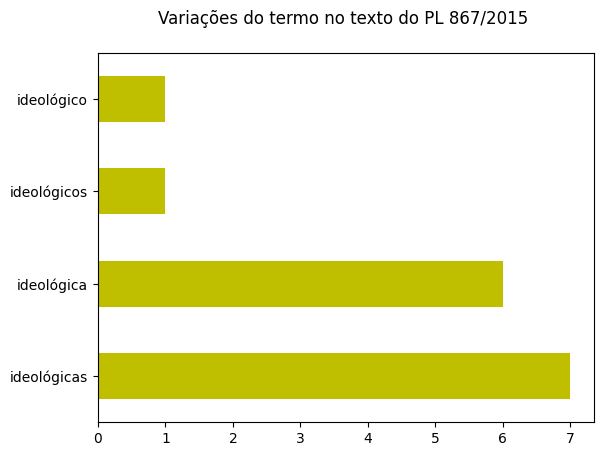

In [57]:
## plota um gráfico de barras a partir das informações de ideologia
dados['ideo'].value_counts().plot(kind='barh',title='Variações do termo no texto do PL 867/2015 \n',color='y')

<Axes: title={'center': 'Variações do termo no texto do PL 867/2015 \n'}>

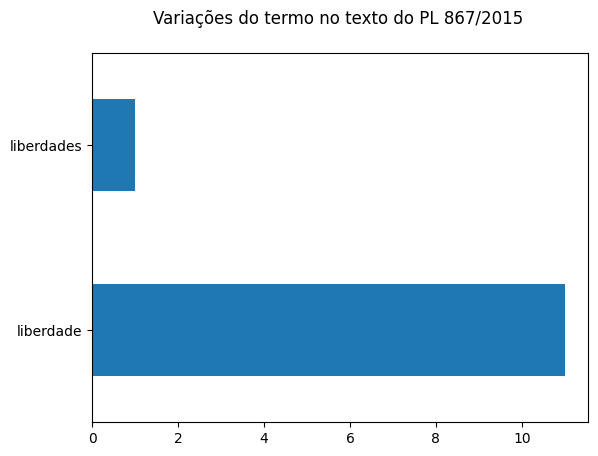

In [58]:
## plota um gráfico de barras a partir das informações de liberdade
dados['liber'].value_counts().plot(kind='barh',title='Variações do termo no texto do PL 867/2015 \n')

#### Alguns simbolos e caracteres importantes em expressões regulares:

* \w : representa qualquer caractere alfanumérico.
* \+ : busca uma ou mais repetições da expressão anterior.
* \| : separador de opções de uma expressão.
* () : usado para definir as fronteiras exatas em uma expressão.
* {} : indica a posição

#### Grupos de Termos

In [62]:
out_findall = re.findall('(morais|escola|doutrinar)', textoPlEsp) ## vários
print(out_findall)

['escola', 'escola', 'escola', 'morais', 'escola', 'escola', 'escola', 'morais', 'morais', 'escola']


#### Termos Compostos

In [73]:
expressao = re.findall('\w+ doutrinação \w+ \w+ \w+ \w+ \w+', textoPlEsp)
list(expressao)

['da doutrinação política e ideológica nas escolas',
 'a doutrinação política e ideológica em sala',
 'a doutrinação cria as condições para o',
 'da doutrinação política e ideológica nas escolas']

#### Sulfixos das palavras

In [78]:
expressao = re.findall('\w+ção', textoPlEsp)
list(expressao)

['proposição',
 'contaminação',
 'doutrinação',
 'usurpação',
 'educação',
 'Constituição',
 'ação',
 'Constituição',
 'cooptação',
 'Constituição',
 'relação',
 'doutrinação',
 'situação',
 'exploração',
 'doutrinação',
 'doutrinação',
 'doutrinação',
 'doutrinação',
 'violação',
 'Administração',
 'atuação',
 'Constituição',
 'educação',
 'Convenção',
 'educação',
 'relação',
 'Constituição',
 'Educação',
 'educação']